In [1]:
from keras.datasets import reuters
from keras.models import *
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
word_dim = 10000
label_dim = 46

In [3]:
def vectorize_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [4]:
def to_one_hot(labels, dimension):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [5]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=word_dim)
x_train = vectorize_sequences(x_train, word_dim)
# y_train = to_one_hot(y_train, label_dim)
y_train = np.array(y_train)
x_test = vectorize_sequences(x_test, word_dim)
# y_test = to_one_hot(y_test, label_dim)
y_test = np.array(y_test)
print(x_train.shape, len(x_train), y_train.shape, len(y_train))
print(x_test.shape, len(x_test), y_test.shape, len(y_test))

(8982, 10000) 8982 (8982,) 8982
(2246, 10000) 2246 (2246,) 2246


In [6]:
network = Sequential()
network.add(Dense(128, activation='relu', input_shape = (word_dim,)))

network.add(Dense(label_dim, activation='softmax'))

In [7]:
network.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'rmsprop',
    metrics = ['acc']
)

In [8]:
history = network.fit(
    x_train[1000:], y_train[1000:],
    epochs = 9,
    batch_size = 512,
    validation_data=(x_train[:1000], y_train[:1000])
)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 236us/step - loss: 2.2761 - acc: 0.5893 - val_loss: 1.4968 - val_acc: 0.7000
Epoch 2/9
7982/7982 [==============================] - 2s 195us/step - loss: 1.1695 - acc: 0.7662 - val_loss: 1.1318 - val_acc: 0.7580
Epoch 3/9
7982/7982 [==============================] - 2s 195us/step - loss: 0.8077 - acc: 0.8376 - val_loss: 0.9699 - val_acc: 0.7980
Epoch 4/9
7982/7982 [==============================] - 2s 194us/step - loss: 0.5918 - acc: 0.8845 - val_loss: 0.8831 - val_acc: 0.8180
Epoch 5/9
7982/7982 [==============================] - 2s 194us/step - loss: 0.4490 - acc: 0.9113 - val_loss: 0.8302 - val_acc: 0.8300
Epoch 6/9
7982/7982 [==============================] - 2s 196us/step - loss: 0.3471 - acc: 0.9313 - val_loss: 0.8308 - val_acc: 0.8220
Epoch 7/9
7982/7982 [==============================] - 2s 196us/step - loss: 0.2805 - acc: 0.9401 - val_loss: 0.8148 - val_acc: 0.8250
Epoch 8

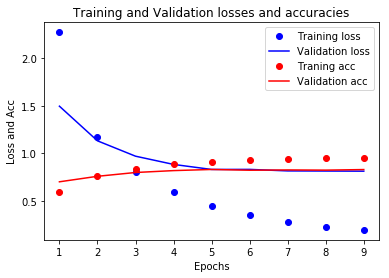

In [9]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(loss) + 1)
plt.clf()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.plot(epochs, acc, 'ro', label = 'Traning acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and Validation losses and accuracies')
plt.xlabel('Epochs')
plt.ylabel('Loss and Acc')
plt.legend()

plt.show()

In [10]:
network.evaluate(x_test, y_test)

2246/2246 [==============================] - 0s 170us/step


[0.9295960712517783, 0.798753339269813]

In [11]:
predictions = network.predict(x_test)
np.argmax(predictions[0])

3